## Data Analysis and Machine Learning Applications for Sales Prediction and Optimization.

### import librires :

In [9]:
import numpy as np
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

### Read data And EDA :

In [5]:
df = pd.read_csv("sales.csv",index_col="Row ID")

In [6]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9994,CA-2017-119914,2017/05/04,2017/05/09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
df.shape

(9994, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.plot(subplots=True,figsize=(12,5))

array([<Axes: xlabel='Row ID'>, <Axes: xlabel='Row ID'>,
       <Axes: xlabel='Row ID'>, <Axes: xlabel='Row ID'>,
       <Axes: xlabel='Row ID'>], dtype=object)

In [12]:
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
4428,US-2017-103226,2017/09/22,2017/09/28,Standard Class,DW-13195,David Wiener,Corporate,United States,Albuquerque,New Mexico,87105,West,OFF-PA-10002666,Office Supplies,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,27.18,3,0.0,12.231


In [13]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [14]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [15]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [16]:
sns.heatmap(df.isnull(),cmap='coolwarm')
plt.title("Find Null :")

Text(0.5, 1.0, 'Find Null :')

In [17]:
plt.figure(figsize=(25,5))
sns.barplot(df.isnull())
plt.title("Find Null :")

Text(0.5, 1.0, 'Find Null :')

In [18]:
df['Order ID']=df['Order ID'].str.split("-").str.get(0)
df['Customer ID']=df['Customer ID'].str.split("-").str.get(0)

In [19]:
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
5463,CA,2014-01-19,2014-01-20,First Class,TS,Toby Swindell,Consumer,United States,Scottsdale,Arizona,85254,West,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",32.34,10,0.7,-23.716


In [20]:
df["Cost"] = df['Sales'] - df['Profit']
df["Discounted Price"] = df["Sales"] * (1 - df["Discount"])    ### useful in Dashboard

In [21]:
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Discounted Price
Row ID,,,,,,,,,,,,,,,,,,,,,
7545,US,2017-12-02,2017-12-06,Standard Class,BS,Bill Stewart,Corporate,United States,Denver,Colorado,...,FUR-CH-10002335,Furniture,Chairs,Hon GuestStacker Chair,906.68,5,0.2,68.001,838.679,725.344


In [22]:
df.duplicated().sum()

1

In [23]:
df=df.drop_duplicates()
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Discounted Price
Row ID,,,,,,,,,,,,,,,,,,,,,
4614,US,2016-12-31,2017-01-06,Standard Class,EP,Emily Phan,Consumer,United States,Jacksonville,Florida,...,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.48,5,0.2,8.218,15.262,18.784


In [24]:
df['Region'].value_counts()

Region
West       3203
East       2847
Central    2323
South      1620
Name: count, dtype: int64

In [25]:
df['Country'].value_counts()

Country
United States    9993
Name: count, dtype: int64

In [26]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [27]:
df = df.drop(columns=['Country'])

In [28]:
heat_Q=df.groupby("Quantity")[['Sales','Profit','Cost','Discounted Price']].sum()
heat_Q

,Sales,Profit,Cost,Discounted Price
Quantity,,,,
1,53251.9345,7440.4801,45811.4544,46192.557905
2,288810.1078,38460.4676,250349.6402,247330.184474
3,422060.6007,57015.5250,365045.0757,365615.483961
4,323670.9944,44223.3908,279447.6036,276645.818032
5,415661.6965,49516.5945,366145.1020,361088.936395
6,207122.3214,10325.4678,196796.8536,165053.014362
7,239908.3659,34286.9730,205621.3929,210382.588717
8,117760.1760,10856.7960,106903.3800,100382.295200
9,128505.5901,17687.8908,110817.6993,113371.239843


In [29]:
sns.heatmap(heat_Q,linecolor='white',linewidths=0.5,cmap='Set2')

<Axes: title={'center': 'Find Null :'}, ylabel='Quantity'>

In [30]:
group_State=df.groupby(["State",'City'])[['Profit','Cost']].describe()
group_State

Profit                                                \
                      count        mean         std       min         25%   
State     City                                                              
Alabama   Auburn        6.0   75.434517   94.558996    1.0904    4.050300   
          Decatur      13.0   76.929854  116.133068    6.8724    8.804400   
          Florence      5.0   49.731780   70.894801    1.9629    2.440200   
          Hoover        4.0    4.679325    3.425727    1.5588    2.967300   
          Huntsville   10.0  100.525720  175.027966    1.1946    8.642100   
...                     ...         ...         ...       ...         ...   
Wisconsin Superior      9.0   57.120244   97.598326    1.4456    4.964800   
          Waukesha      1.0   14.170000         NaN   14.1700   14.170000   
          Wausau        4.0   22.607650   30.884703    5.8233    5.858925   
          West Allis    2.0   14.185400   14.157126    4.1748    9.180100   
Wyoming   Cheyenne      1.0  100.196000         NaN  100.1960  100.196000   

                                                       Cost               \
                            50%         75%       max count         mean   
State     City                                                             
Alabama   Auburn       45.12600  108.816600  240.8595   6.0   219.037150   
          Decatur      15.55200   56.203200  316.1392  13.0   182.671685   
          Florence      5.61600   74.852400  163.7874   5.0   349.738220   
          Hoover        3.80685    5.518875    9.5448   4.0   126.783175   
          Huntsville   21.66600   55.865850  527.9840  10.0   147.911280   
...                         ...         ...       ...   ...          ...   
Wisconsin Superior     21.33000   35.277200  301.9680   9.0    87.294200   
          Waukesha     14.17000   14.170000   14.1700   1.0    40.330000   
          Wausau        7.88045   24.629175   68.8464   4.0    56.762350   
          West Allis   14.18540   19.190700   24.1960   2.0   111.054600   
Wyoming   Cheyenne    100.19600  100.196000  100.1960   1.0  1502.940000   

                                                                      \
                             std        min          25%         50%   
State     City                                                         
Alabama   Auburn      303.119043     2.6696     4.754700   128.87685   
          Decatur     273.649259     8.0676    12.199200    32.36400   
          Florence    730.948642     2.5398     5.307100     6.86400   
          Hoover      227.435484     3.7232     9.400625    17.85715   
          Huntsville  246.123788     2.4254    15.999900    51.75720   
...                          ...        ...          ...         ...   
Wisconsin Superior    119.712344     4.1144    12.155200    26.07000   
          Waukesha           NaN    40.3300    40.330000    40.33000   
          Wausau       80.602686     6.5667    14.173575    21.72455   
          West Allis  150.909881     4.3452    57.699900   111.05460   
Wyoming   Cheyenne           NaN  1502.9400  1502.940000  1502.94000   

                                              
                              75%        max  
State     City                                
Alabama   Auburn       262.731225   783.0696  
          Decatur      215.928000   899.7808  
          Florence      77.907600  1656.0726  
          Hoover       135.239700   467.6952  
          Huntsville   120.190050   791.9760  
...                           ...        ...  
Wisconsin Superior      90.712800   327.1320  
          Waukesha      40.330000    40.3300  
          Wausau        64.313325   177.0336  
          West Allis   164.409300   217.7640  
Wyoming   Cheyenne    1502.940000  1502.9400  

[604 rows x 16 columns]

#### Find Outliers ?

In [32]:
df.plot(kind='box',figsize=(13,5))

<Axes: >

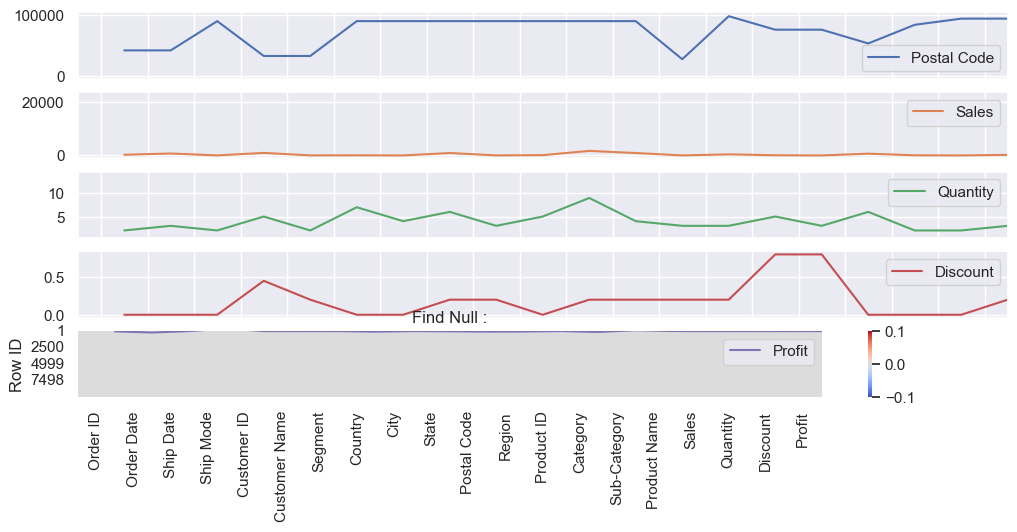

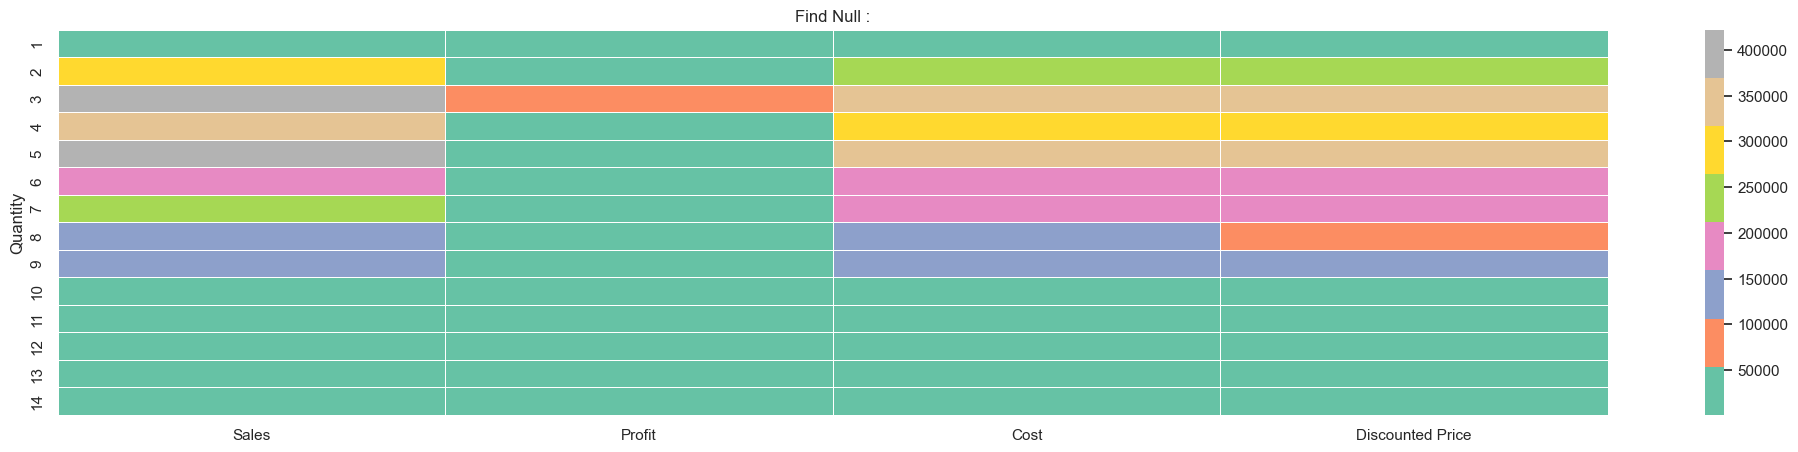

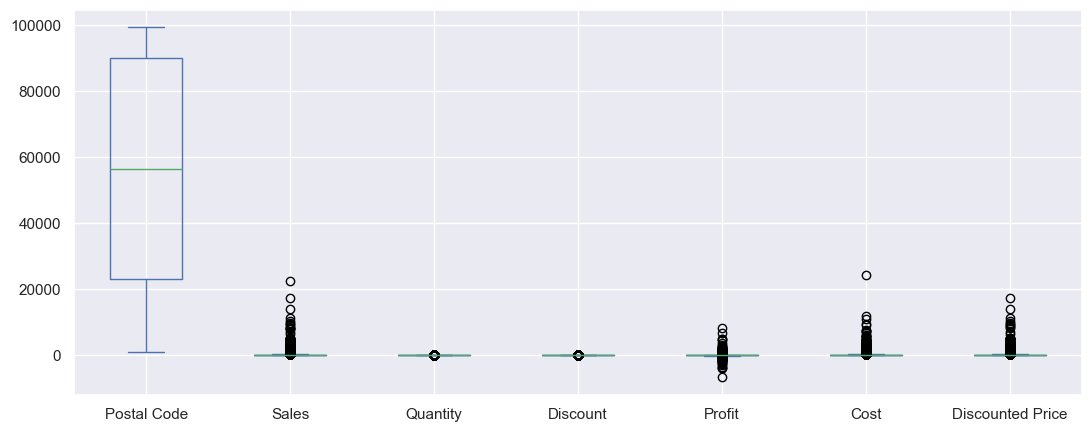

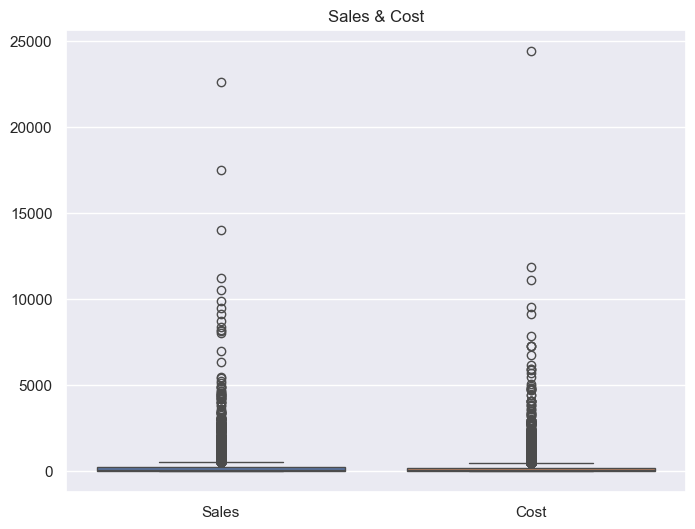

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df[['Sales','Cost']])
plt.title('Sales & Cost')
plt.show()

In [34]:
q1 = df['Cost'].quantile(0.25)
q3 = df['Cost'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Cost'] < lower_bound) | (df['Cost'] > upper_bound)]

In [35]:
df = df.copy()
df.loc[(((df['Cost'] < lower_bound), 'Cost'))] = lower_bound
df.loc[(((df['Cost'] > upper_bound), 'Cost'))] = upper_bound

In [36]:
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

In [37]:
df = df.copy()
df.loc[(((df['Sales'] < lower_bound), 'Sales'))] = lower_bound
df.loc[(((df['Sales'] > upper_bound), 'Sales'))] = upper_bound

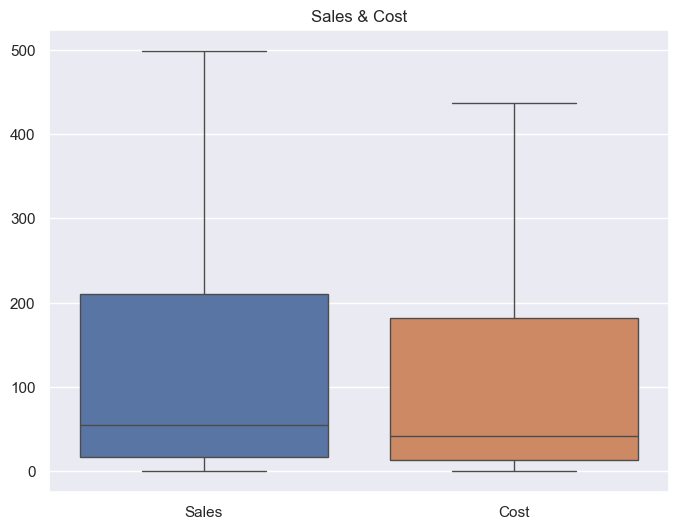

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(df[['Sales','Cost']])
plt.title('Sales & Cost')
plt.show()

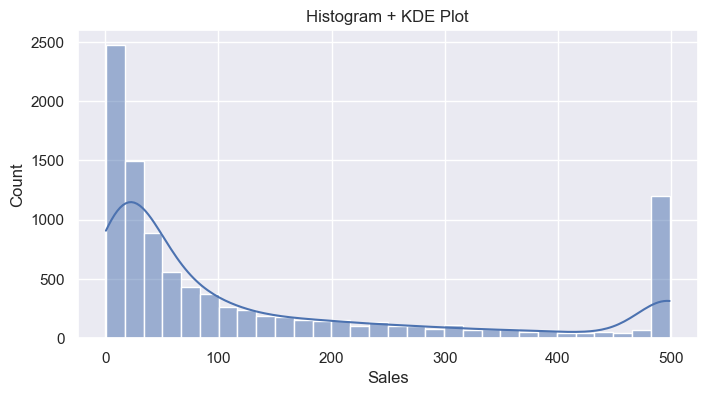

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Histogram + KDE Plot")
plt.xlabel('Sales')
plt.show()

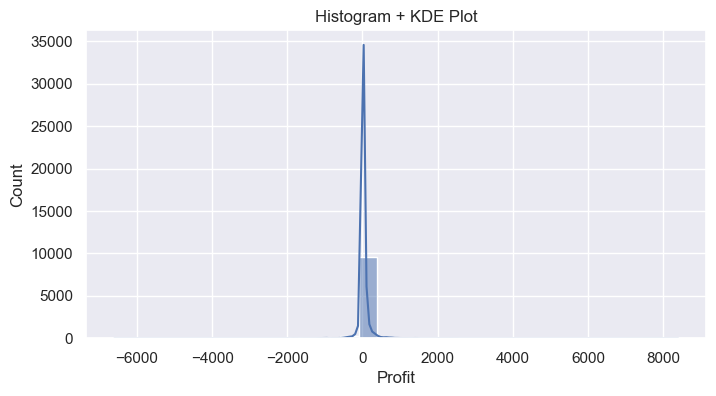

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Profit'], kde=True, bins=30)
plt.title("Histogram + KDE Plot")
plt.xlabel('Profit')
plt.show()

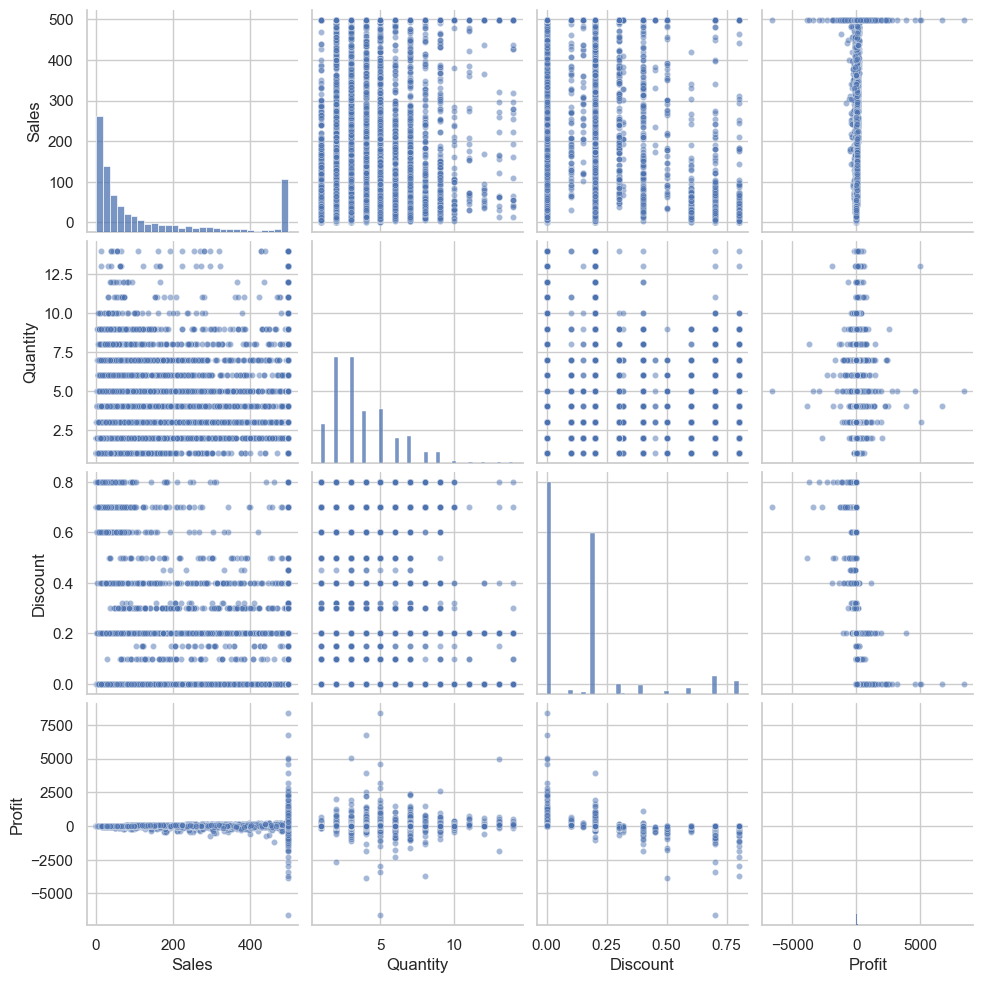

In [41]:
numeric_cols = ["Sales", "Quantity", "Discount", "Profit"]

sns.set(style="whitegrid")
pairplot = sns.pairplot(df[numeric_cols], diag_kind='hist', plot_kws={'alpha':0.5, 's':20})
plt.show()


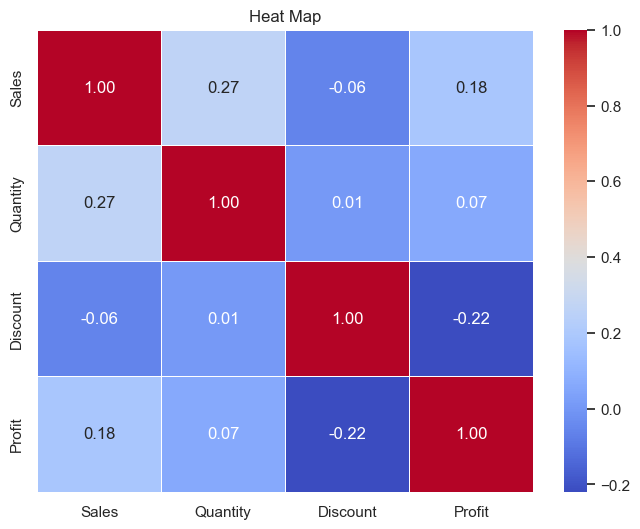

In [42]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heat Map")
plt.show()


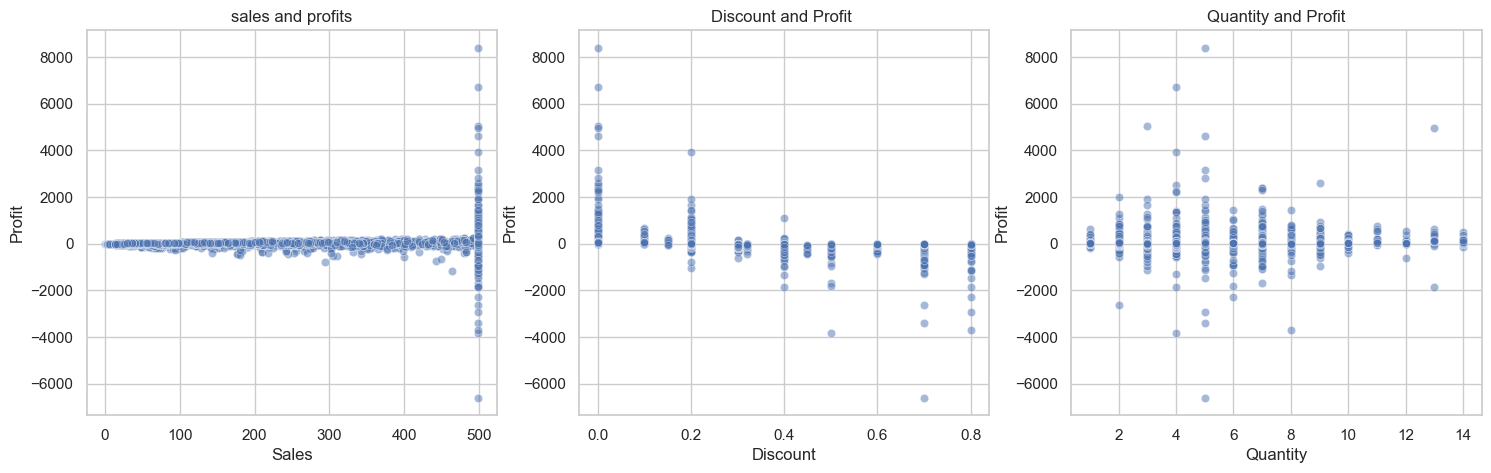

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=df["Sales"], y=df["Profit"], alpha=0.5, ax=axes[0])
axes[0].set_title("sales and profits")

sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5, ax=axes[1])
axes[1].set_title("Discount and Profit ")

sns.scatterplot(x=df["Quantity"], y=df["Profit"], alpha=0.5, ax=axes[2])
axes[2].set_title("Quantity and Profit")

plt.show()


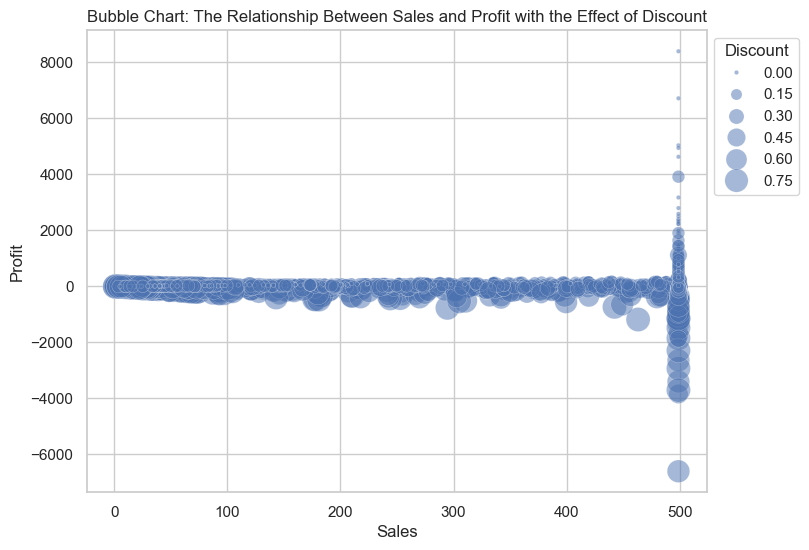

In [44]:
plt.figure(figsize=(8, 6))
bubble_chart = sns.scatterplot(x=df["Sales"], y=df["Profit"], size=df["Discount"], alpha=0.5, sizes=(10, 300))

plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Bubble Chart: The Relationship Between Sales and Profit with the Effect of Discount")
plt.legend(title="Discount", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

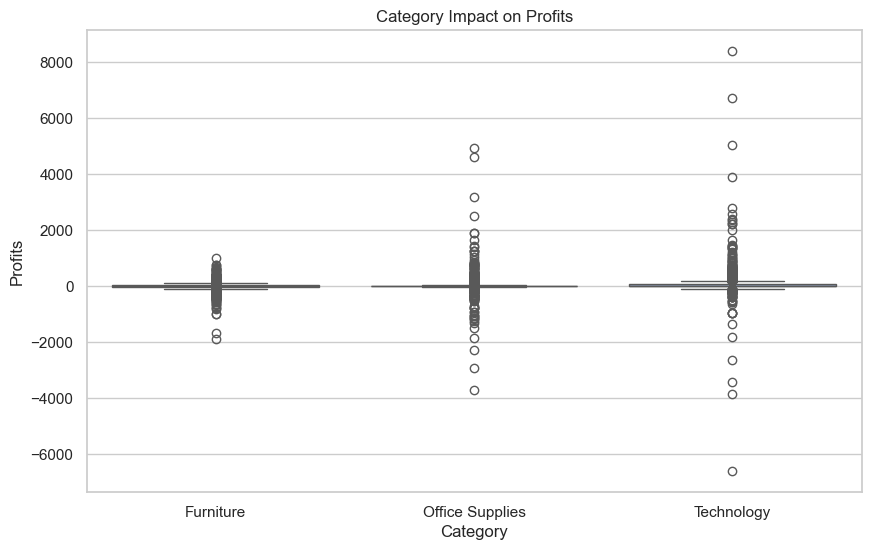

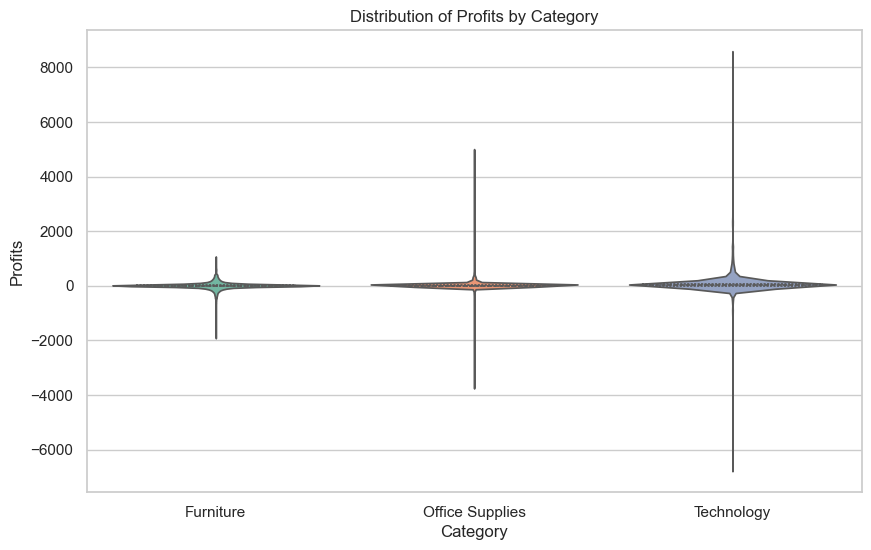

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Category"], y=df["Profit"], palette="Set2")
plt.title("Category Impact on Profits")
plt.xlabel("Category")
plt.ylabel("Profits")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Category"], y=df["Profit"], palette="Set2", inner="quartile")
plt.title("Distribution of Profits by Category")
plt.xlabel("Category")
plt.ylabel("Profits")
plt.show()

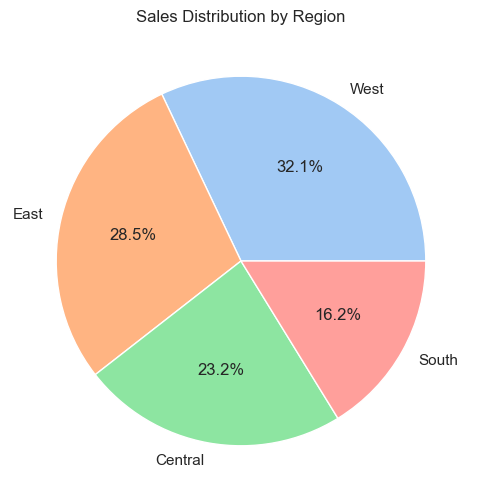

In [46]:
if "Region" in df.columns:
    plt.figure(figsize=(6, 6))
    df["Region"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Sales Distribution by Region")
    plt.ylabel("")
    plt.show()
else:
    print("There is no appropriate classification column for drawing a Pie Chart.")


In [47]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.day
df["Weekday"] = df["Order Date"].dt.weekday  # 0 = الاثنين, 6 = الأحد

print(df[["Order Date", "Year", "Month", "Day", "Weekday"]].head())


       Order Date  Year  Month  Day  Weekday
Row ID                                      
1      2016-11-08  2016     11    8        1
2      2016-11-08  2016     11    8        1
3      2016-06-12  2016      6   12        6
4      2015-10-11  2015     10   11        6
5      2015-10-11  2015     10   11        6


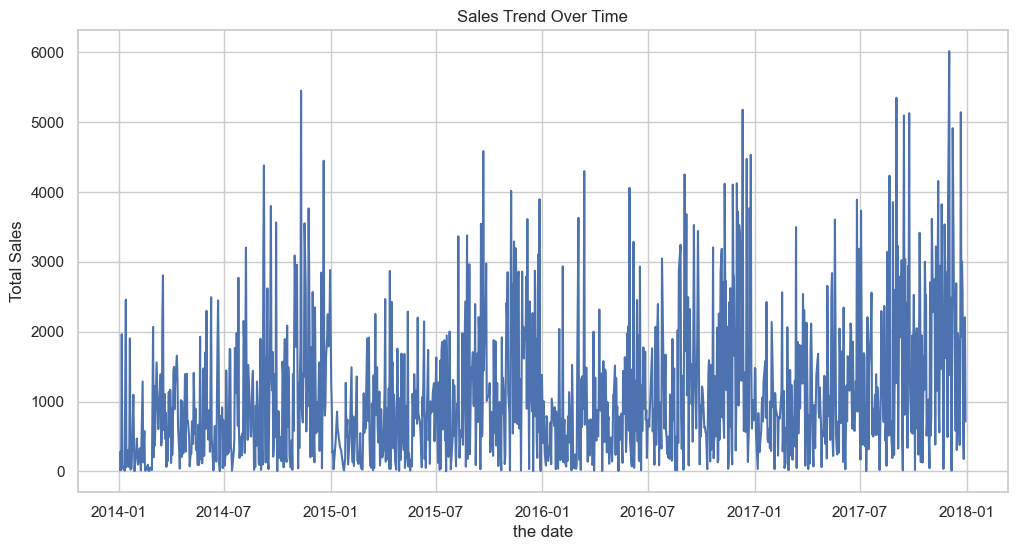

In [48]:
sales_trend = df.groupby("Order Date")["Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend["Order Date"], y=sales_trend["Sales"])
plt.xlabel("the date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.show()

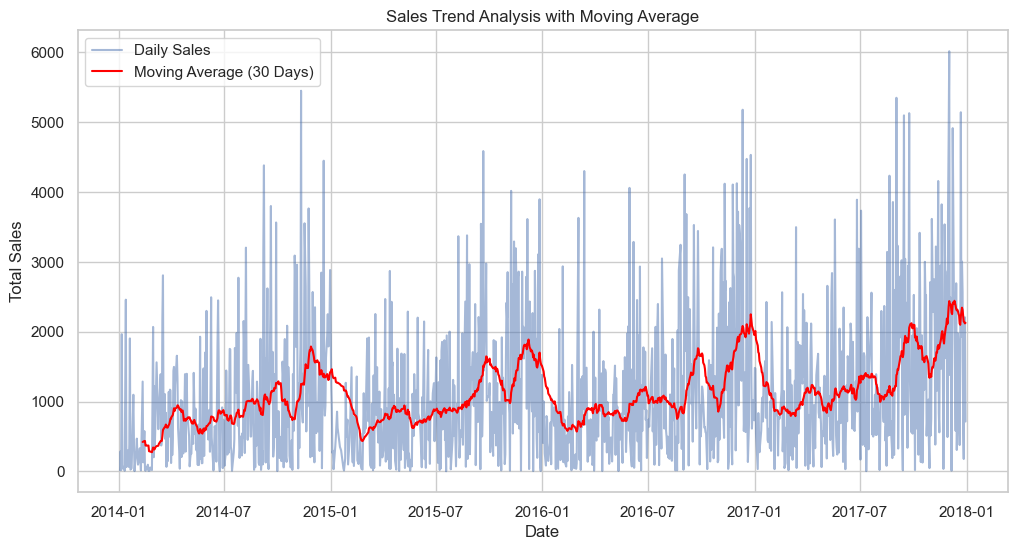

In [49]:
sales_trend["Moving_Avg"] = sales_trend["Sales"].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend["Order Date"], y=sales_trend["Sales"], label="Daily Sales", alpha=0.5)
sns.lineplot(x=sales_trend["Order Date"], y=sales_trend["Moving_Avg"], label="Moving Average (30 Days)", color="red")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Analysis with Moving Average")
plt.legend()
plt.show()

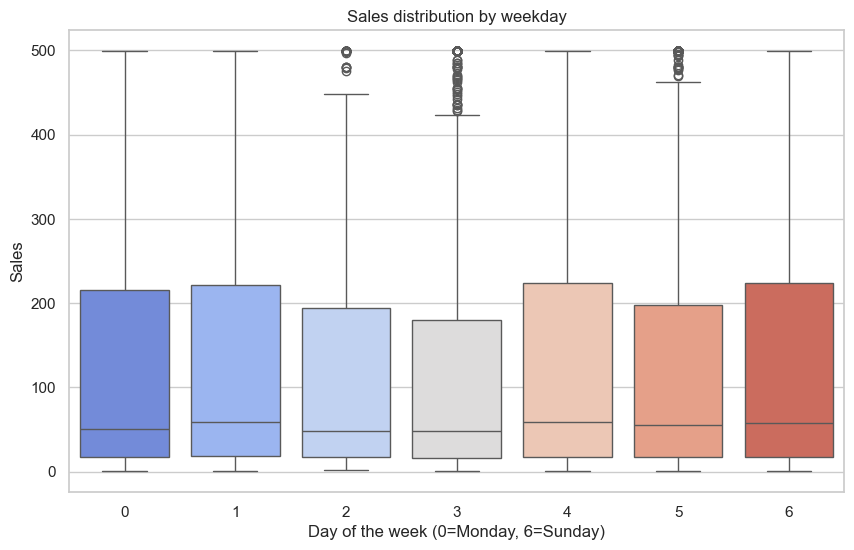

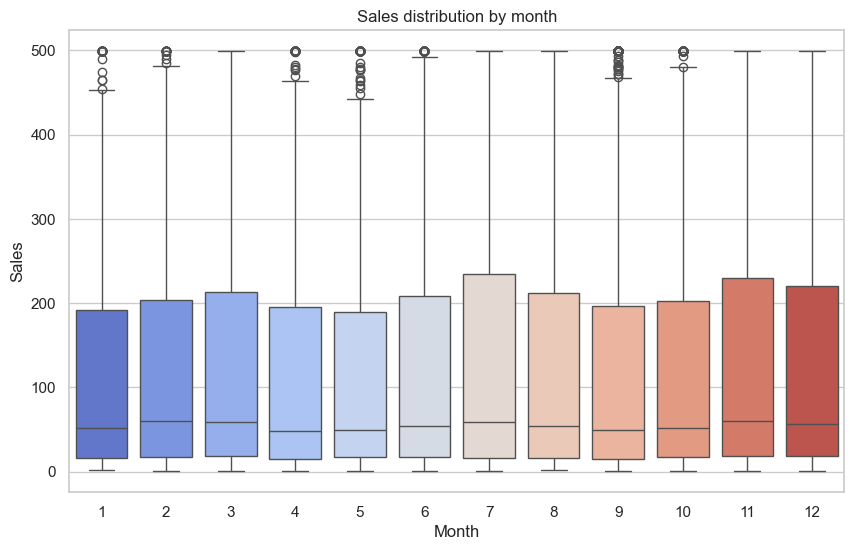

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Weekday"], y=df["Sales"], palette="coolwarm")
plt.xlabel("Day of the week (0=Monday, 6=Sunday)")
plt.ylabel("Sales")
plt.title("Sales distribution by weekday")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Month"], y=df["Sales"], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales distribution by month")
plt.show()

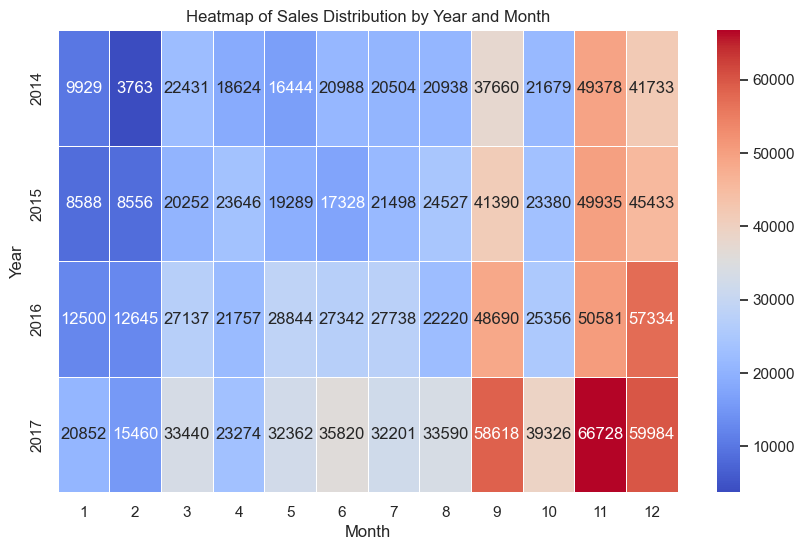

In [51]:
heatmap_data = df.pivot_table(index="Year", columns="Month", values="Sales", aggfunc="sum")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Heatmap of Sales Distribution by Year and Month")
plt.show()

In [2]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

sales_file_path = "sales.csv"
df = pd.read_csv(sales_file_path)

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month_name()

app = dash.Dash(__name__)
app.title = "Advanced Sales Dashboard"

app.layout = html.Div([
    html.H1("📊 Advanced Sales Dashboard", style={'textAlign': 'center', 'color': '#333'}),
    
    html.Div([
        dcc.Dropdown(
            id='year-filter',
            options=[{'label': str(year), 'value': year} for year in sorted(df["Year"].unique())],
            value=df["Year"].max(),
            clearable=False,
            style={'width': '48%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='category-filter',
            options=[{'label': cat, 'value': cat} for cat in df["Category"].unique()],
            value='All',
            clearable=False,
            style={'width': '48%', 'display': 'inline-block'}
        )
    ]),
    
    dcc.Graph(id='sales-trend'),
    dcc.Graph(id='category-sales'),
    dcc.Graph(id='profit-discount'),
    dcc.Graph(id='region-sales'),
    dcc.Graph(id='monthly-sales')
])

@app.callback(
    [Output('sales-trend', 'figure'),
     Output('category-sales', 'figure'),
     Output('profit-discount', 'figure'),
     Output('region-sales', 'figure'),
     Output('monthly-sales', 'figure')],
    [Input('year-filter', 'value'),
     Input('category-filter', 'value')]
)
def update_charts(selected_year, selected_category):
    filtered_df = df[df["Year"] == selected_year]
    if selected_category != 'All':
        filtered_df = filtered_df[filtered_df["Category"] == selected_category]
 
    sales_trend = filtered_df.groupby("Order Date")["Sales"].sum().reset_index()
    fig1 = px.line(sales_trend, x="Order Date", y="Sales", title="📈 Sales Trend", markers=True)

    fig2 = px.bar(filtered_df.groupby("Sub-Category")["Sales"].sum().reset_index(), x="Sub-Category", y="Sales", title="🛒 Sales by Sub-Category", color="Sub-Category")

    fig3 = px.scatter(filtered_df, x="Discount", y="Profit", color="Category", title="💰 Profit vs Discount", size="Sales", hover_data=['Product Name'])

    region_sales = filtered_df.groupby("Region")["Sales"].sum().reset_index()
    fig4 = px.bar(region_sales, x="Region", y="Sales", title="🌍 Sales by Region", color="Region")

    monthly_sales = filtered_df.groupby("Month")["Sales"].sum().reset_index()
    fig5 = px.line(monthly_sales, x="Month", y="Sales", title="📅 Monthly Sales", markers=True, line_shape='spline')
    
    return fig1, fig2, fig3, fig4, fig5

if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.